# DATASET- IMDB 1000 movies Dataset

In [1]:
# importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD, KNNBasic, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score,accuracy_score
import time

/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Load the dataset
movies = pd.read_csv('imdb_top_1000.csv')

In [3]:
movies.head()

,MovieID,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,2,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,4,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,5,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# DATA PRE_PROCESSING

In [4]:
#Pre-process the Dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MovieID        1000 non-null   int64  
 1   Poster_Link    1000 non-null   object 
 2   Series_Title   1000 non-null   object 
 3   Released_Year  1000 non-null   object 
 4   Certificate    899 non-null    object 
 5   Runtime        1000 non-null   object 
 6   Genre          1000 non-null   object 
 7   IMDB_Rating    1000 non-null   float64
 8   Overview       1000 non-null   object 
 9   Meta_score     843 non-null    float64
 10  Director       1000 non-null   object 
 11  Star1          1000 non-null   object 
 12  Star2          1000 non-null   object 
 13  Star3          1000 non-null   object 
 14  Star4          1000 non-null   object 
 15  No_of_Votes    1000 non-null   int64  
 16  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(13)
memory usage: 132

In [5]:
# Check for missing values
movies.isna().sum()

MovieID            0
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
#Deleting unwated Columns
del movies['Certificate']
del movies['Meta_score']
del movies['Gross']

In [7]:
movies.describe()

,MovieID,IMDB_Rating,No_of_Votes
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,7.949300,2.736929e+05
std,288.819436,0.275491,3.273727e+05
min,1.000000,7.600000,2.508800e+04
25%,250.750000,7.700000,5.552625e+04
50%,500.500000,7.900000,1.385485e+05
75%,750.250000,8.100000,3.741612e+05
max,1000.000000,9.300000,2.343110e+06


# DATASET VISUALISATION/EXPLORATION

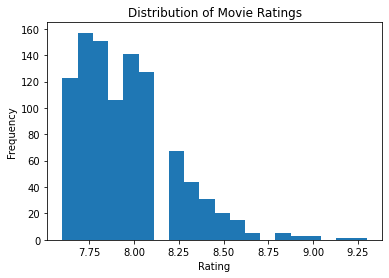

In [8]:
# Visualize the distribution of movie ratings
#sns.distplot(movies['vote_average'], bins=20, kde=False)
plt.hist(movies['IMDB_Rating'], bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


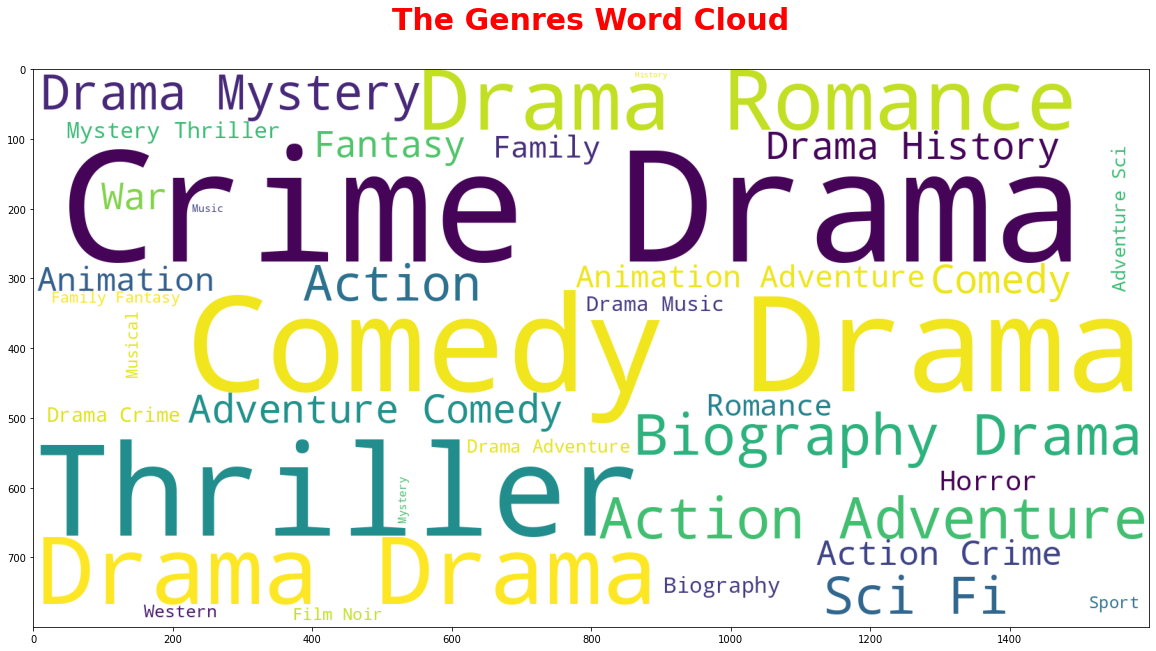

In [9]:
plt.figure(figsize=(20,20))
plt.title('The Genres Word Cloud\n', fontsize=30, weight=600, color='red')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(movies['Genre']))

plt.imshow(wc)

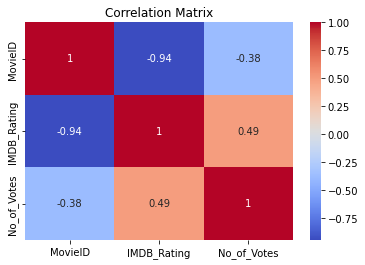

In [10]:
# Visualize the correlation between variables
corr_matrix = movies.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

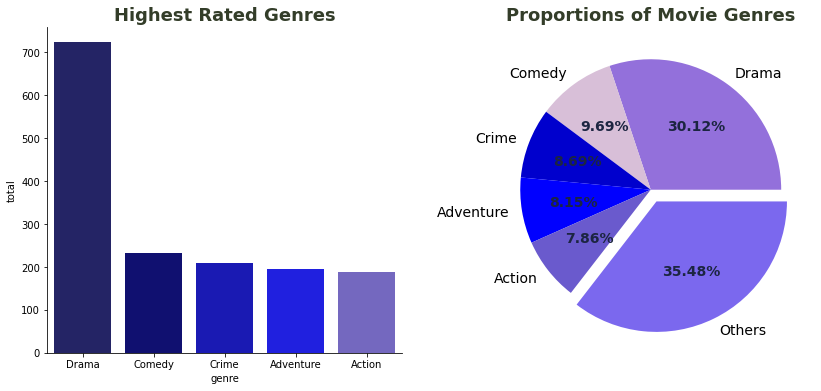

In [11]:
# Visualize the top genres
genres_list = []
for i in movies['Genre']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['midnightblue', 'navy', 'mediumblue', 'blue', 'slateblue'])
ax.set_title('Highest Rated Genres', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Proportions of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['mediumpurple', 'thistle', 'mediumblue', 'blue', 'slateblue', 'mediumslateblue'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')
